# 无监督学习-Kmeans聚类算法

- 聚类: 
    - 核心: 将数据分为多个组,探索每个组数据是否有联系
    - 学习类型: 无监督学习,不需要标签进行训练
    - 典型的算法: K-means算法,DBSCAN算法,层次聚类,
    - 算法输出: 结果是不确定的,同样的聚类,根据不同的业务需求,可能是一个好结果,也可能是一个坏结果,

- 分类:
    - 核心: 从已经分组的数据中去学习,把新数据放到已经分好的组中去
    - 学习类型: 有监督学习, 需要标签进行训练
    - 典型算法: 决策树,逻辑回归,adaboost, 随机森林,xgboost, GDBT
    - 算法的输出:  分类的结果是确定的,好坏是客观的,不是根据业务的算法和需求而决定,

1. 先找到5个人-->随机的抽取K个样本作为最初的点(质心)
2. 计算每个人和这五个人的距离,从而将每个人分配给离他们最近的那个人, --> 将每个人样本分配到离他们最新的质心,生存K个簇
3. 计算划分之后的这些组的新的质心.-->对于每个簇,计算所有被划分的该簇点样本的平均值作为新的质心
4. 重复上面的这个过程,当质心的位置不在变化时,迭代停止,聚类完成.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'Times New Roman'
from sklearn.datasets import make_blobs # 生成一些模拟点
from scipy.spatial.distance import cdist # 用于计算点和点之间的距离

In [66]:
np.random.seed(1210)
n_samples = 30000 # 样本数量
n_features = 2 #  特征的数量
centers = 3 # 数据中心点的数量
X, y  = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers,random_state=1210)

# 先获取三个点的随机索引
initial_centers_indices = np.random.choice(range(n_samples),size=centers,replace=False)

# 取到这三个点
initialin_centers = X[initial_centers_indices]

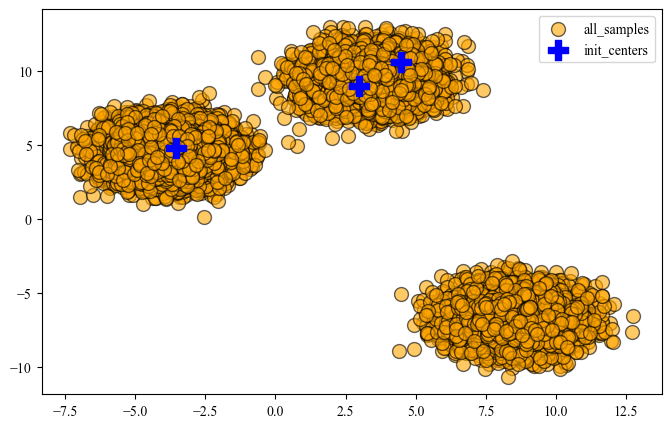

In [67]:
plt.figure(figsize=(8,5),dpi=100)
plt.scatter(X[:,0],X[:,1],edgecolors='black',c='orange',
            linewidths=1,s=100,label='all_samples',alpha=.6)

plt.scatter(initial_centers[:,0],initial_centers[:,1],marker='P',s=200,c='blue',
           label='init_centers'
           )
plt.legend()
plt.show()

## 给每个数据分配最近的中心点

In [68]:
def assign_clusters(X, centers):
    distances = cdist(X,centers)
    labels = np.argmin(distances, axis=1)
    return labels

## 根据新的簇标签,更新这些点,

In [69]:
def update_centers(X, labels, k=3):
    new_centers = [] # 初始化一个新的中心点列表
    for i in range(k): # 遍历每个簇
        cluster_points = X[labels == i]
        if len(cluster_points) > 0:
            new_center = np.mean(cluster_points, axis=0) # 计算新的重点点
            new_centers.append(new_center)
        else:
            new_centers.append(X[np.random.choice[X.shape[0]]])
    return np.array(new_centers)

### 计算新的聚类中心点,并可视化

In [77]:
X = X[:3000]

In [78]:
labels = assign_clusters(X, initial_centers)
new_centers = update_centers(X, labels, 3)

In [79]:
new_centers

array([[-0.1759035 ,  0.89730001],
       [ 4.18111949, 10.21347247],
       [ 5.83053494,  2.10318357]])

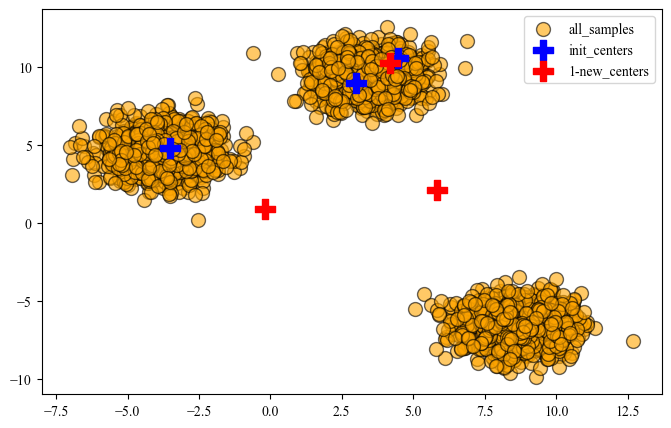

In [80]:
plt.figure(figsize=(8,5),dpi=100)
plt.scatter(X[:,0],X[:,1],edgecolors='black',c='orange',
            linewidths=1,s=100,label='all_samples',alpha=.6)

plt.scatter(initial_centers[:,0],initial_centers[:,1],marker='P',s=200,c='blue',
           label='init_centers'
           )
plt.scatter(new_centers[:,0],new_centers[:,1],marker='P',s=200,c='red',
           label='1-new_centers'
           )

plt.legend()
plt.show()

### 第二次迭代

In [81]:
labels = assign_clusters(X, new_centers)
new_centers2 = update_centers(X, labels, 3)

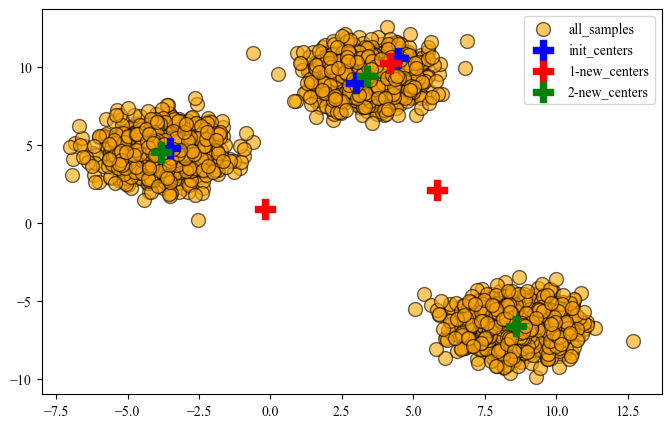

In [82]:
plt.figure(figsize=(8,5),dpi=100)
plt.scatter(X[:,0],X[:,1],edgecolors='black',c='orange',
            linewidths=1,s=100,label='all_samples',alpha=.6)

plt.scatter(initial_centers[:,0],initial_centers[:,1],marker='P',s=200,c='blue',
           label='init_centers'
           )
plt.scatter(new_centers[:,0],new_centers[:,1],marker='P',s=200,c='red',
           label='1-new_centers'
           )

plt.scatter(new_centers2[:,0],new_centers2[:,1],marker='P',s=200,c='green',
           label='2-new_centers'
           )

plt.legend()
plt.show()

## 第三次迭代

In [83]:
labels = assign_clusters(X, new_centers2)
new_centers3 = update_centers(X, labels, 3)

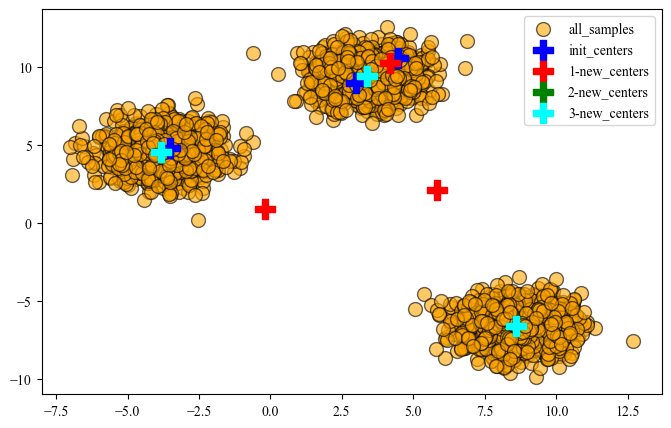

In [84]:
plt.figure(figsize=(8,5),dpi=100)
plt.scatter(X[:,0],X[:,1],edgecolors='black',c='orange',
            linewidths=1,s=100,label='all_samples',alpha=.6)

plt.scatter(initial_centers[:,0],initial_centers[:,1],marker='P',s=200,c='blue',
           label='init_centers'
           )
plt.scatter(new_centers[:,0],new_centers[:,1],marker='P',s=200,c='red',
           label='1-new_centers'
           )

plt.scatter(new_centers2[:,0],new_centers2[:,1],marker='P',s=200,c='green',
           label='2-new_centers'
           )
plt.scatter(new_centers3[:,0],new_centers3[:,1],marker='P',s=200,c='cyan',
           label='3-new_centers'
           )
plt.legend()
plt.show()

1. 我们应该如何选择K值"
2.  什么时候应该停止迭代 
3. 聚类的好坏如何评价?
4. Sklean中如何实现聚类算法?

## 什么时候应该停止迭代

1. 相邻两次迭代过程中质心位置不在发生变化
2. 相邻两次迭代过程中各所属类别不在发生变化

目标: 簇内数据差异尽可能的小, 簇外数据差异尽可能的大, 这个差异 是由样本点到其所在簇点质新的距离来衡量的.

In [85]:
from sklearn.cluster import KMeans

n_clusters = 3

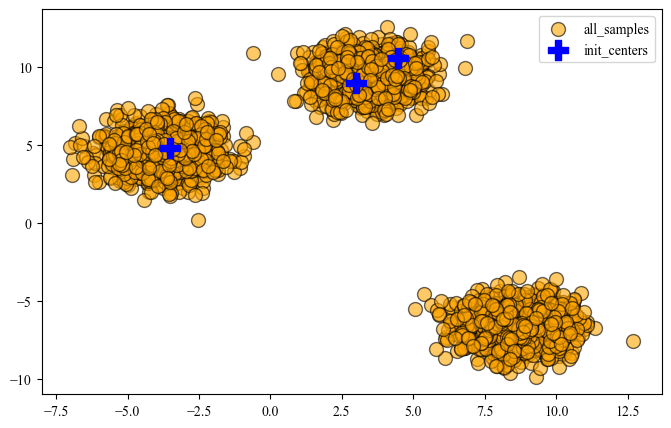

In [86]:
plt.figure(figsize=(8,5),dpi=100)
plt.scatter(X[:,0],X[:,1],edgecolors='black',c='orange',
            linewidths=1,s=100,label='all_samples',alpha=.6)

plt.scatter(initial_centers[:,0],initial_centers[:,1],marker='P',s=200,c='blue',
           label='init_centers'
           )
plt.legend()
plt.show()

In [88]:
X.shape

(3000, 2)

In [63]:
cluster = KMeans(n_clusters=n_clusters, random_state=1210)
cluster.fit(X)

y_pred = cluster.labels_
# 因为sklearn中Kmeans并不需要建模,因此我们只需要fit就能拿到聚类的结果
# 当然我们之前使用的predict和fit_predict也可以直接用,结果不变
cluster.predict(X) == y_pred
print()

D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


### SKlean中的聚类算法

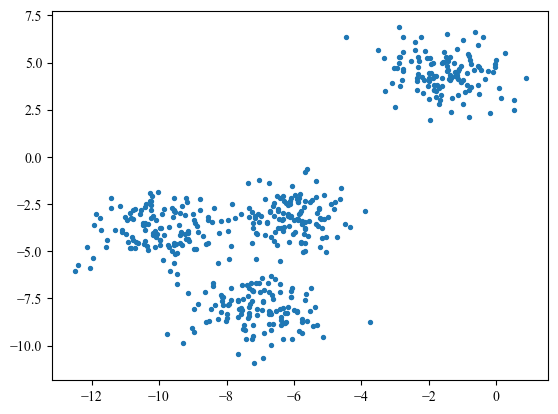

In [91]:
X, y = make_blobs(n_samples=500, n_features=2, centers=4,random_state=1)
fig, ax1 = plt.subplots(1)
ax1.scatter(X[:,0],X[:,1],marker='o',s=8)
plt.show()

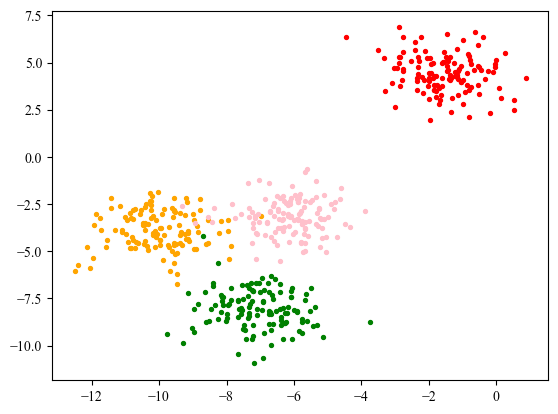

In [94]:
X, y = make_blobs(n_samples=500, n_features=2, centers=4,random_state=1)
color = ['red','orange','green','pink']
fig,ax1 = plt.subplots(1)
for i in range(4):
    ax1.scatter(X[y == i,0],X[y==i,1],marker='o',s=8,c=color[i])
plt.show()

In [100]:
X, y = make_blobs(n_samples=500, n_features=2, centers=4,random_state=1)

D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


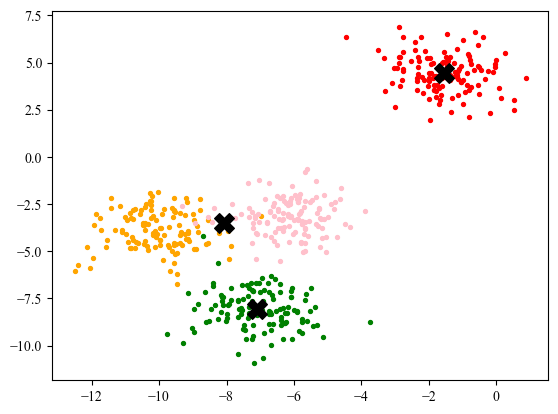

In [101]:
n_clusters = 3
cluster = KMeans(n_clusters=n_clusters,random_state=0)
cluster.fit(X)
centroid  = cluster.cluster_centers_ # 获取聚类的中心
color = ['red','orange','green','pink']
fig,ax1 = plt.subplots(1)
for i in range(4):
    ax1.scatter(X[y == i,0],X[y==i,1],marker='o',s=8,c=color[i])
ax1.scatter(centroid[:,0],centroid[:,1],marker='X',s=200,c='black')
plt.show()

In [111]:
def plot_kmeans(n):
    n_clusters = n
    cluster = KMeans(n_clusters=n_clusters,random_state=0)
    cluster.fit(X)
    centroid  = cluster.cluster_centers_ # 获取聚类的中心
    color = ['red','orange','green','pink']
    fig,ax1 = plt.subplots(1)
    for i in range(4):
        ax1.scatter(X[y == i,0],X[y==i,1],marker='o',s=8,c=color[i])
    ax1.scatter(centroid[:,0],centroid[:,1],marker='X',s=200,c='black')
    plt.show()
    return cluster.labels_

D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


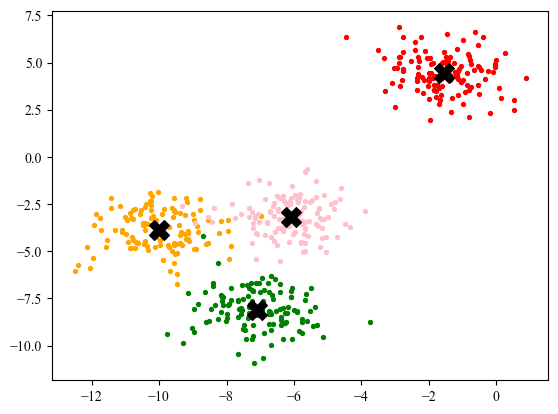

In [106]:
plot_kmeans(n=4)

## 使用轮廓系数来评价聚类的好坏 

In [127]:
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings(action='ignore')

In [128]:
y_pred = cluster.predict(X)
silhouette_score(X, y_pred) # 返回到是轮廓系数,

0.5877515633992911

In [129]:
def plot_kmeans(n):
    n_clusters = n
    cluster = KMeans(n_clusters=n_clusters,random_state=0)
    cluster.fit(X)
    centroid  = cluster.cluster_centers_ # 获取聚类的中心
    y_pred = cluster.labels_
    return y_pred

In [130]:
for i in range(2,10):
    y_pred = plot_kmeans(n=i)
    silhouette_score(X,y_pred)
    print(f"聚类中心为: {i}时,轮廓系数为: {silhouette_score(X,y_pred)}")

聚类中心为: 2时,轮廓系数为: 0.7049787496083262
聚类中心为: 3时,轮廓系数为: 0.5877515633992911
聚类中心为: 4时,轮廓系数为: 0.6505186632729437
聚类中心为: 5时,轮廓系数为: 0.5562702511808184
聚类中心为: 6时,轮廓系数为: 0.44131023005295217
聚类中心为: 7时,轮廓系数为: 0.44146818049007497
聚类中心为: 8时,轮廓系数为: 0.33164096126964615
聚类中心为: 9时,轮廓系数为: 0.3354059393362131


轮廓系数是评估聚类效果的一个指标,结合凝聚度和分离度两个概念来衡量一个数据点与其所在簇的匹配程度,轮廓系数取值一般再-1到1之间,

- 接近+1:  表示样本与其自身簇中的其他样本非常相似,而且与其他簇中的样本差异性很大,这意味这聚类效果很好,
- 接近0: 表示样本与自身簇和其他簇之间距离差不多,聚类效果不好
- 接近-1, 表示样本被划分到错误的簇中,因为它与其他簇的样本相似

In [131]:
def plot_kmeans(n):
    n_clusters = n
    cluster = KMeans(n_clusters=n_clusters,random_state=0)
    cluster.fit(X)
    centroid  = cluster.cluster_centers_ # 获取聚类的中心
    color = ['red','orange','green','pink']
    fig,ax1 = plt.subplots(1)
    for i in range(4):
        ax1.scatter(X[y == i,0],X[y==i,1],marker='o',s=8,c=color[i])
    ax1.scatter(centroid[:,0],centroid[:,1],marker='X',s=200,c='black')
    plt.show()
    return cluster.labels_

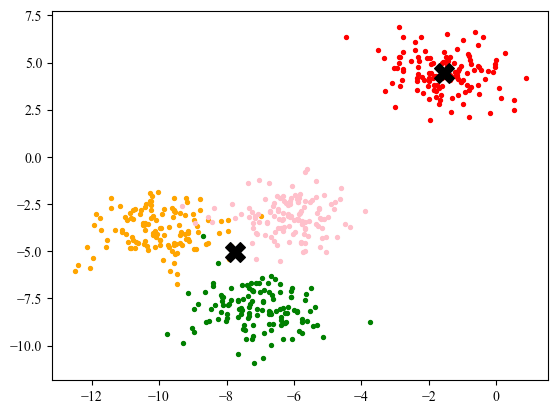

聚类中心为: 2时,轮廓系数为: 0.7049787496083262


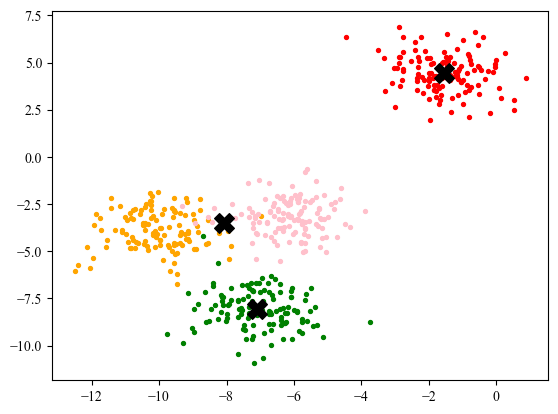

聚类中心为: 3时,轮廓系数为: 0.5877515633992911


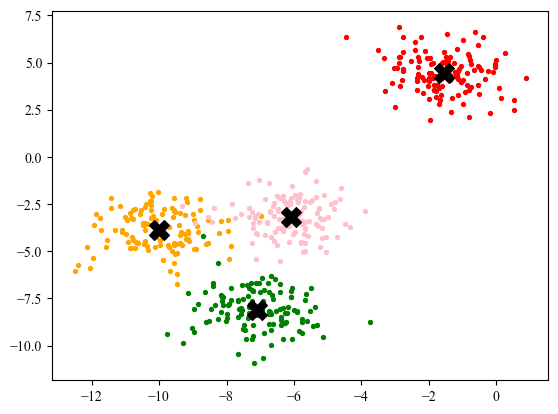

聚类中心为: 4时,轮廓系数为: 0.6505186632729437


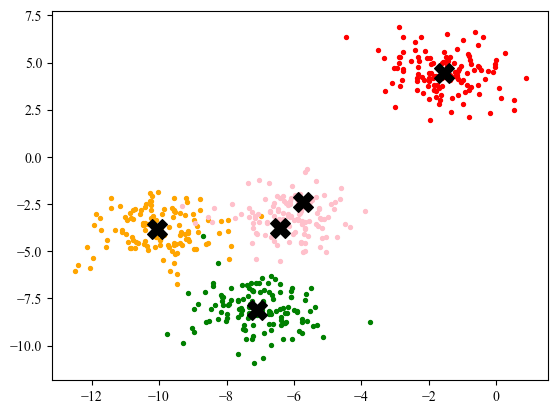

聚类中心为: 5时,轮廓系数为: 0.5562702511808184


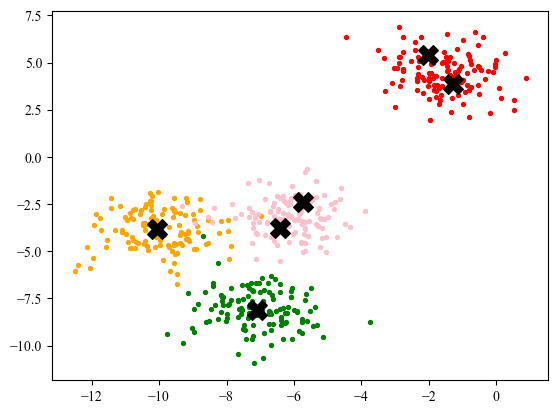

聚类中心为: 6时,轮廓系数为: 0.44131023005295217


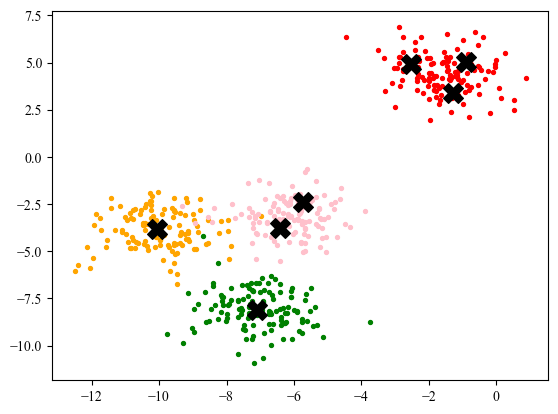

聚类中心为: 7时,轮廓系数为: 0.44146818049007497


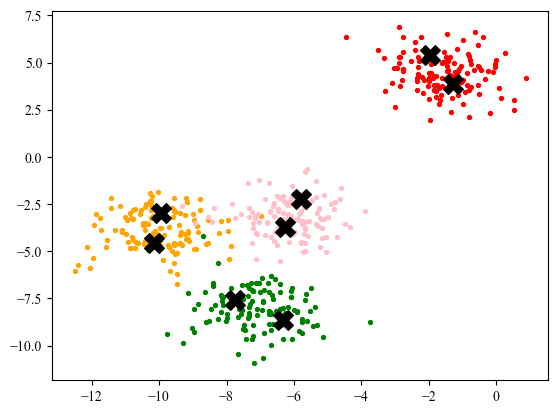

聚类中心为: 8时,轮廓系数为: 0.33164096126964615


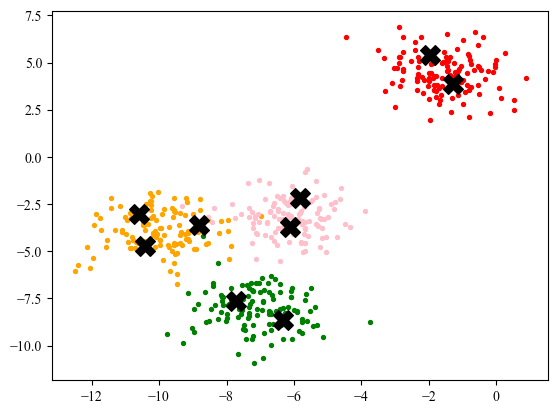

聚类中心为: 9时,轮廓系数为: 0.3354059393362131


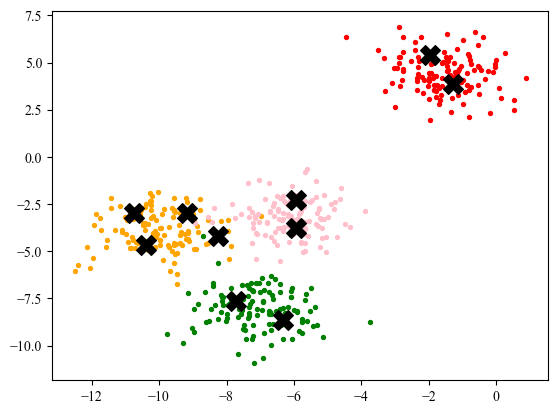

聚类中心为: 10时,轮廓系数为: 0.3253043445210369


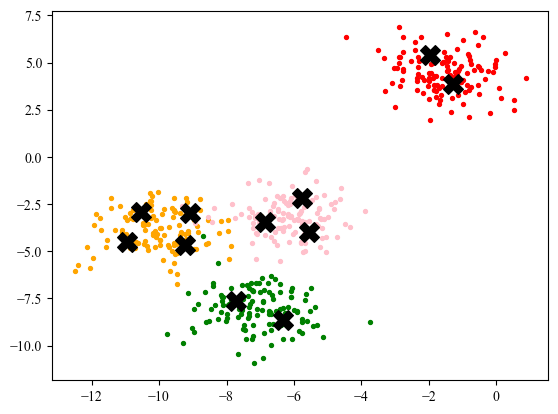

聚类中心为: 11时,轮廓系数为: 0.33806436318926425


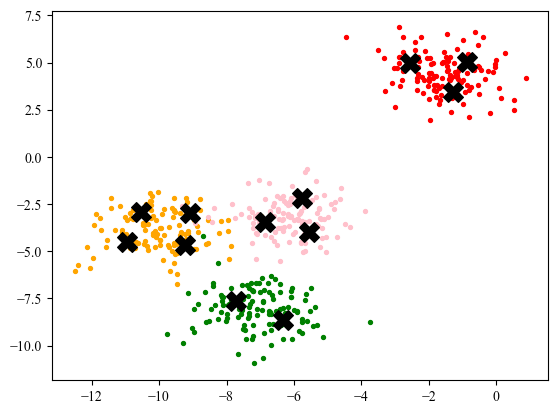

聚类中心为: 12时,轮廓系数为: 0.3374772437961078


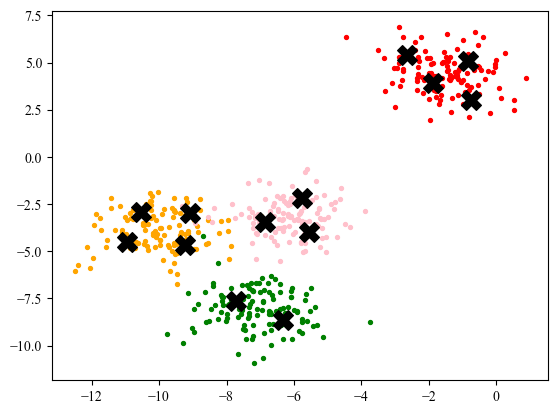

聚类中心为: 13时,轮廓系数为: 0.34084021391260044


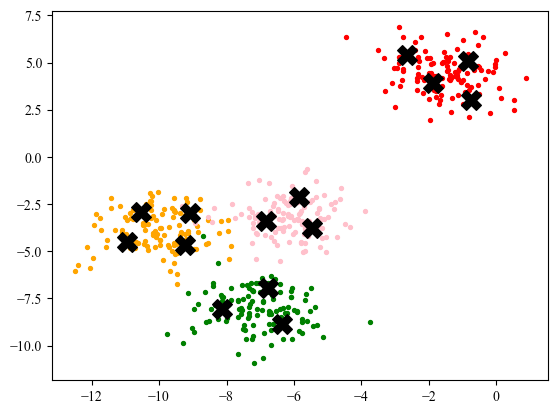

聚类中心为: 14时,轮廓系数为: 0.34711792115205775


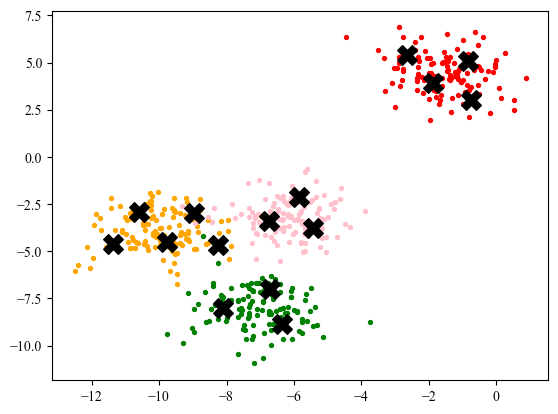

聚类中心为: 15时,轮廓系数为: 0.3485632276432908


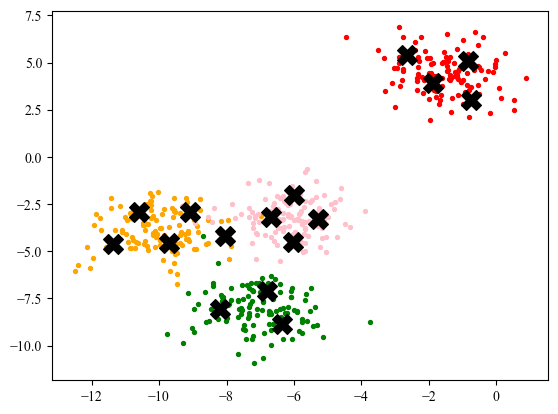

聚类中心为: 16时,轮廓系数为: 0.340948609177672


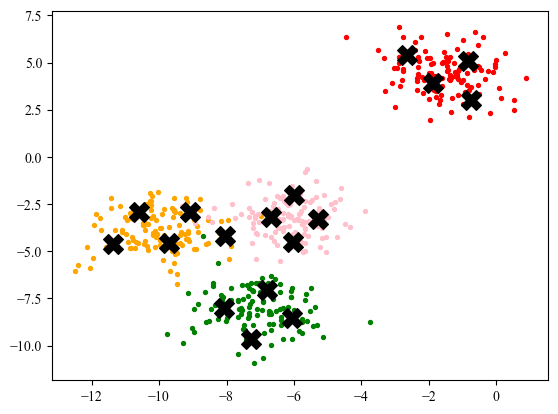

聚类中心为: 17时,轮廓系数为: 0.3435455399876627


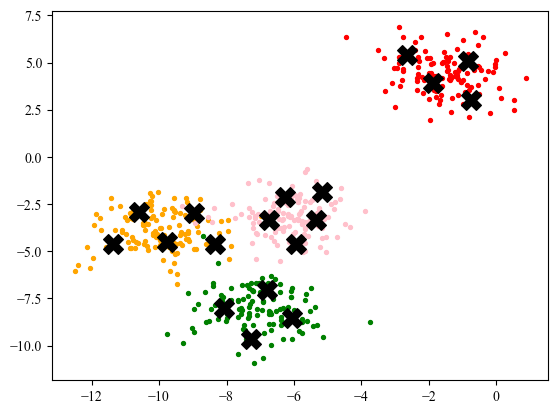

聚类中心为: 18时,轮廓系数为: 0.3447820565109247


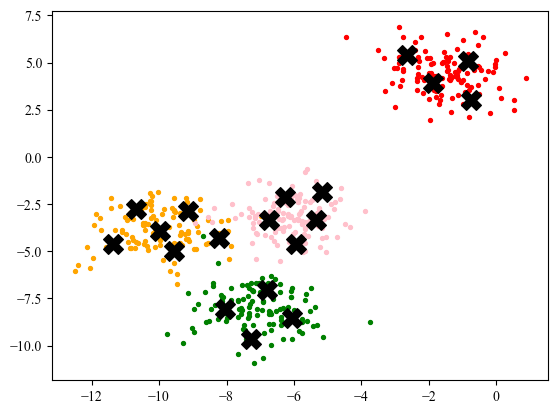

聚类中心为: 19时,轮廓系数为: 0.3366831416795513


In [133]:
va = []
for i in range(2,20):
    y_pred = plot_kmeans(n=i)
    va.append(silhouette_score(X,y_pred))
    print(f"聚类中心为: {i}时,轮廓系数为: {silhouette_score(X,y_pred)}")

## 绘制轮廓系数图

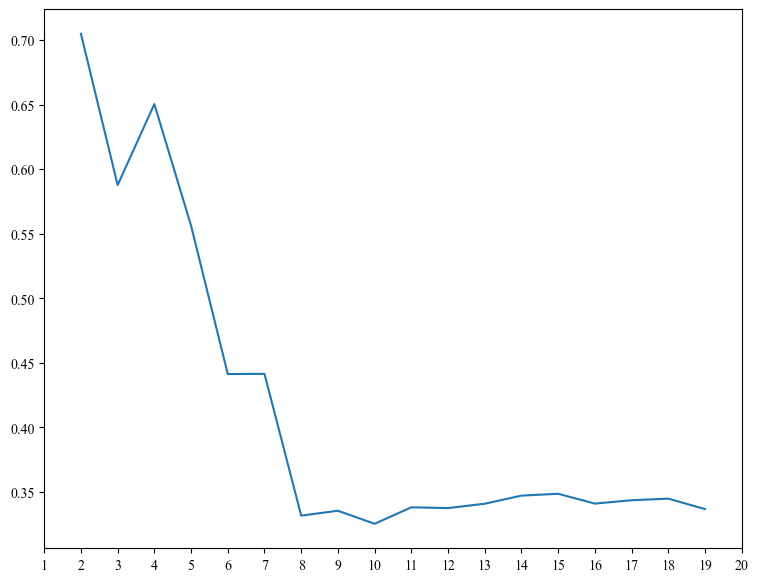

In [145]:
plt.figure(figsize=(9,7),dpi=100)
plt.plot(range(2,20),va)
plt.xticks(range(1,21))
plt.show()

### 使用肘方法找到最佳的K值

In [136]:
wcss = []
K_range = range(1, 21)
for k in K_range:
    kmenas = KMeans(n_clusters=k,random_state=0)
    kmenas.fit(X)
    wcss.append(kmenas.inertia_) # 实际就是WSCSS的值

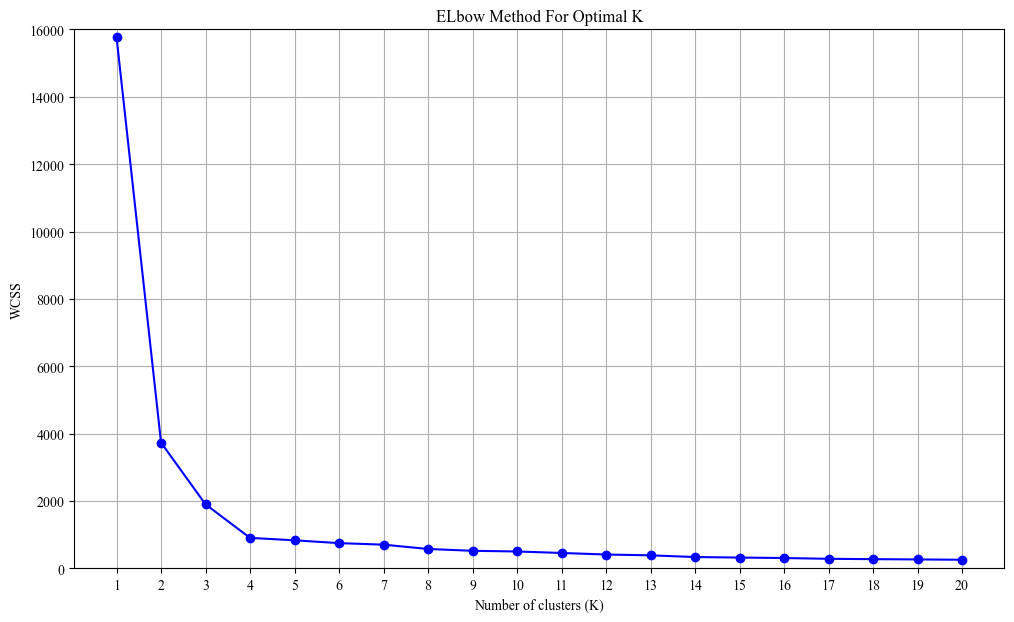

In [146]:
plt.figure(figsize=(12,7),dpi=100)
plt.plot(K_range,wcss, marker='o',linestyle='-',c='b')
plt.grid()
plt.xticks(range(1,21))
plt.ylim(0,16000)
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.title('ELbow Method For Optimal K')
plt.show()

 KMeans(n_clusters=8, *, init='k-means++', n_init='auto', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')

- init: 初始化质心选择方法,
    - kmenas++:初始质心通常彼此远离,引导出比随机初始化更可靠的结果
    - random: 随机选择
- max_iter=300: 最大迭代次数.
- tol=0.001, 前后Inertiax下降值小于某个阈值停止迭代,
- verbose=0, : 日志输出
- random_state=None: 随机数种子
- n_init='auto': 默认10,使用不同的质心,随机初始化种子来运行K-means的算法次数,